In [1]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(5)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from numpy import array

In [2]:
data = pd.read_csv("../data/DPL.csv")
data

,DateTime,DPL
0,2020-04-23 06:34:02,15
1,2020-04-23 09:34:02,15
2,2020-04-24 06:34:01,16
3,2020-04-24 09:34:02,16
4,2020-04-27 06:33:57,16
...,...,...
2497,2022-07-14 04:55:53,13
2498,2022-07-14 05:55:54,13
2499,2022-07-14 07:55:52,13
2500,2022-07-14 08:55:53,13


In [3]:
#Changing datetime to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime']).dt.date

#renaming the columns
data.rename(columns = {'DateTime':'date','DPL':'price'}, inplace = True)
data['date'] = pd.to_datetime(data['date'],format = "%Y-%m-%d")
data

,date,price
0,2020-04-23,15
1,2020-04-23,15
2,2020-04-24,16
3,2020-04-24,16
4,2020-04-27,16
...,...,...
2497,2022-07-14,13
2498,2022-07-14,13
2499,2022-07-14,13
2500,2022-07-14,13


In [4]:
data = data.groupby('date').mean()
data

,price
date,
2020-04-23,15.0
2020-04-24,16.0
2020-04-27,16.0
2020-04-28,16.0
2020-04-29,16.0
...,...
2022-07-11,13.0
2022-07-12,13.0
2022-07-13,13.0


In [5]:
data1=data.reset_index()['price']
data1

0      15.0
1      16.0
2      16.0
3      16.0
4      16.0
       ... 
543    13.0
544    13.0
545    13.0
546    13.0
547    13.0
Name: price, Length: 548, dtype: float64

In [6]:
print("Size of the dataset: ",data1.shape)
print("Checking for null values:\n",data1.isnull().sum())
print("Checking Data-type of each column:\n",data1.dtypes)

Size of the dataset:  (548,)
Checking for null values:
 0
Checking Data-type of each column:
 float64


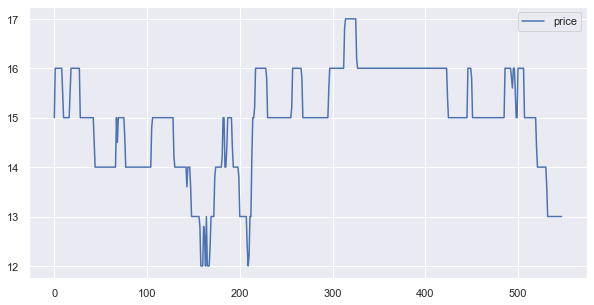

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data1,label='price')
plt.legend()
plt.show()

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [9]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [10]:
len(train_data)

356

In [11]:
training_size,test_size

(356, 192)

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
import numpy
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(345, 10)
(345,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [16]:
X_train.shape[1]

10

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model=Sequential()
model.add(GRU(64,activation='relu', return_sequences=False,input_shape=(time_step,1)))
#model.add(GRU(128,activation='relu'))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
#model.summary()

In [19]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,verbose=2)

Epoch 1/200
11/11 - 2s - loss: 0.1696 - val_loss: 0.0272 - 2s/epoch - 150ms/step
Epoch 2/200
11/11 - 0s - loss: 0.0317 - val_loss: 0.0066 - 86ms/epoch - 8ms/step
Epoch 3/200
11/11 - 0s - loss: 0.0132 - val_loss: 0.0097 - 86ms/epoch - 8ms/step
Epoch 4/200
11/11 - 0s - loss: 0.0063 - val_loss: 0.0027 - 84ms/epoch - 8ms/step
Epoch 5/200
11/11 - 0s - loss: 0.0038 - val_loss: 0.0021 - 85ms/epoch - 8ms/step
Epoch 6/200
11/11 - 0s - loss: 0.0035 - val_loss: 0.0020 - 84ms/epoch - 8ms/step
Epoch 7/200
11/11 - 0s - loss: 0.0035 - val_loss: 0.0020 - 86ms/epoch - 8ms/step
Epoch 8/200
11/11 - 0s - loss: 0.0033 - val_loss: 0.0020 - 86ms/epoch - 8ms/step
Epoch 9/200
11/11 - 0s - loss: 0.0032 - val_loss: 0.0019 - 84ms/epoch - 8ms/step
Epoch 10/200
11/11 - 0s - loss: 0.0032 - val_loss: 0.0018 - 85ms/epoch - 8ms/step
Epoch 11/200
11/11 - 0s - loss: 0.0031 - val_loss: 0.0018 - 85ms/epoch - 8ms/step
Epoch 12/200
11/11 - 0s - loss: 0.0030 - val_loss: 0.0018 - 87ms/epoch - 8ms/step
Epoch 13/200
11/11 - 0s -

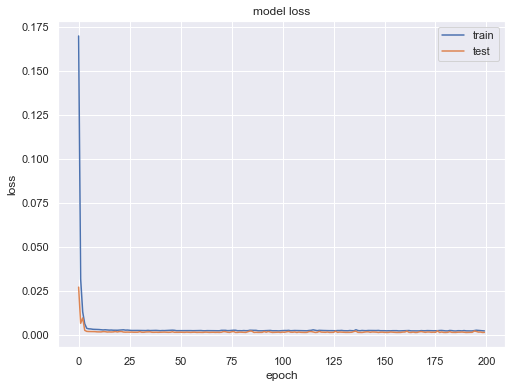

In [20]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [22]:
rstrain_predict=scaler.inverse_transform(train_predict)
rstest_predict=scaler.inverse_transform(test_predict)
rsytest=scaler.inverse_transform(np.array(ytest).reshape(-1,1))
rsytrain=scaler.inverse_transform(np.array(y_train).reshape(-1,1))

In [23]:
RMSE_train=math.sqrt(mean_squared_error(rsytrain,rstrain_predict))
print(RMSE_train)

0.23997947960633617


In [24]:
RMSE_test=math.sqrt(mean_squared_error(rsytest,rstest_predict))
MAE_test=mean_absolute_error(rsytest,rstest_predict)
R2_test=r2_score(rsytest,rstest_predict)
print("RMSE:", RMSE_test)
print("MAE:", MAE_test)
print("R-Squared:", R2_test)

RMSE: 0.19363651835533413
MAE: 0.07488236400962534
R-Squared: 0.9528675581320312


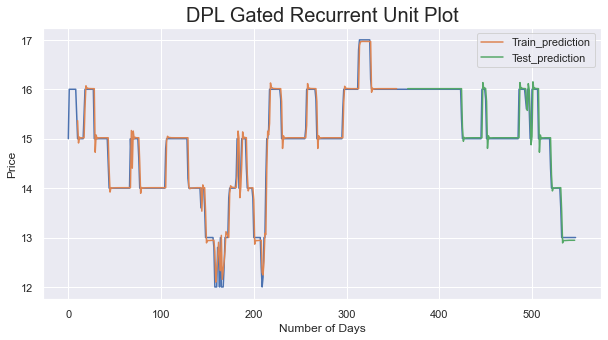

In [25]:
look_back=10
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = rstrain_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = rstest_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.title('DPL Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [26]:
len(test_data)

192

In [27]:
x_input=test_data[182:].reshape(1,-1)
x_input.shape

(1, 10)

In [28]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973,
 0.19999999999999973]

In [29]:
lst_output=[]
n_steps=10
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

In [30]:
forecast_rescaled=scaler.inverse_transform(lst_output)

In [31]:
forecast_rescaled

array([[12.944454  ],
       [12.8817219 ],
       [12.81410676],
       [12.74105874],
       [12.66219069],
       [12.57718351],
       [12.48557453],
       [12.38698085],
       [12.3602054 ],
       [12.41658238],
       [12.491191  ],
       [12.5276341 ],
       [12.51858403],
       [12.48348866],
       [12.44829272],
       [12.4373809 ],
       [12.45227125],
       [12.4755307 ],
       [12.48874483],
       [12.48643917],
       [12.47551669],
       [12.4655344 ],
       [12.46270654],
       [12.46701066],
       [12.47331296],
       [12.47663398],
       [12.47576614],
       [12.47264352],
       [12.4700613 ],
       [12.46959631]])

In [32]:
day_new=np.arange(0,547)
day_pred=np.arange(547,577)

In [33]:
forecast = pd.DataFrame(forecast_rescaled, columns = ['predicted_price'])
forecast.head()

,predicted_price
0,12.944454
1,12.881722
2,12.814107
3,12.741059
4,12.662191


In [34]:
data

,price
date,
2020-04-23,15.0
2020-04-24,16.0
2020-04-27,16.0
2020-04-28,16.0
2020-04-29,16.0
...,...
2022-07-11,13.0
2022-07-12,13.0
2022-07-13,13.0


In [35]:
forecast['date'] = pd.date_range(start='2022-07-15', periods=30, freq='D')
forecast.head()

,predicted_price,date
0,12.944454,2022-07-15
1,12.881722,2022-07-16
2,12.814107,2022-07-17
3,12.741059,2022-07-18
4,12.662191,2022-07-19


In [36]:
forecast = forecast.set_index('date')
forecast

,predicted_price
date,
2022-07-15,12.944454
2022-07-16,12.881722
2022-07-17,12.814107
2022-07-18,12.741059
2022-07-19,12.662191
2022-07-20,12.577184
2022-07-21,12.485575
2022-07-22,12.386981
2022-07-23,12.360205


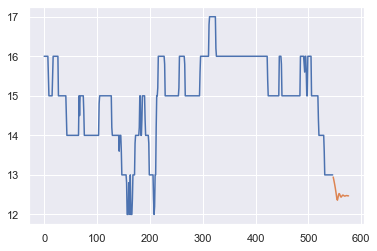

In [37]:
plt.plot(day_new,scaler.inverse_transform(data1[1:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

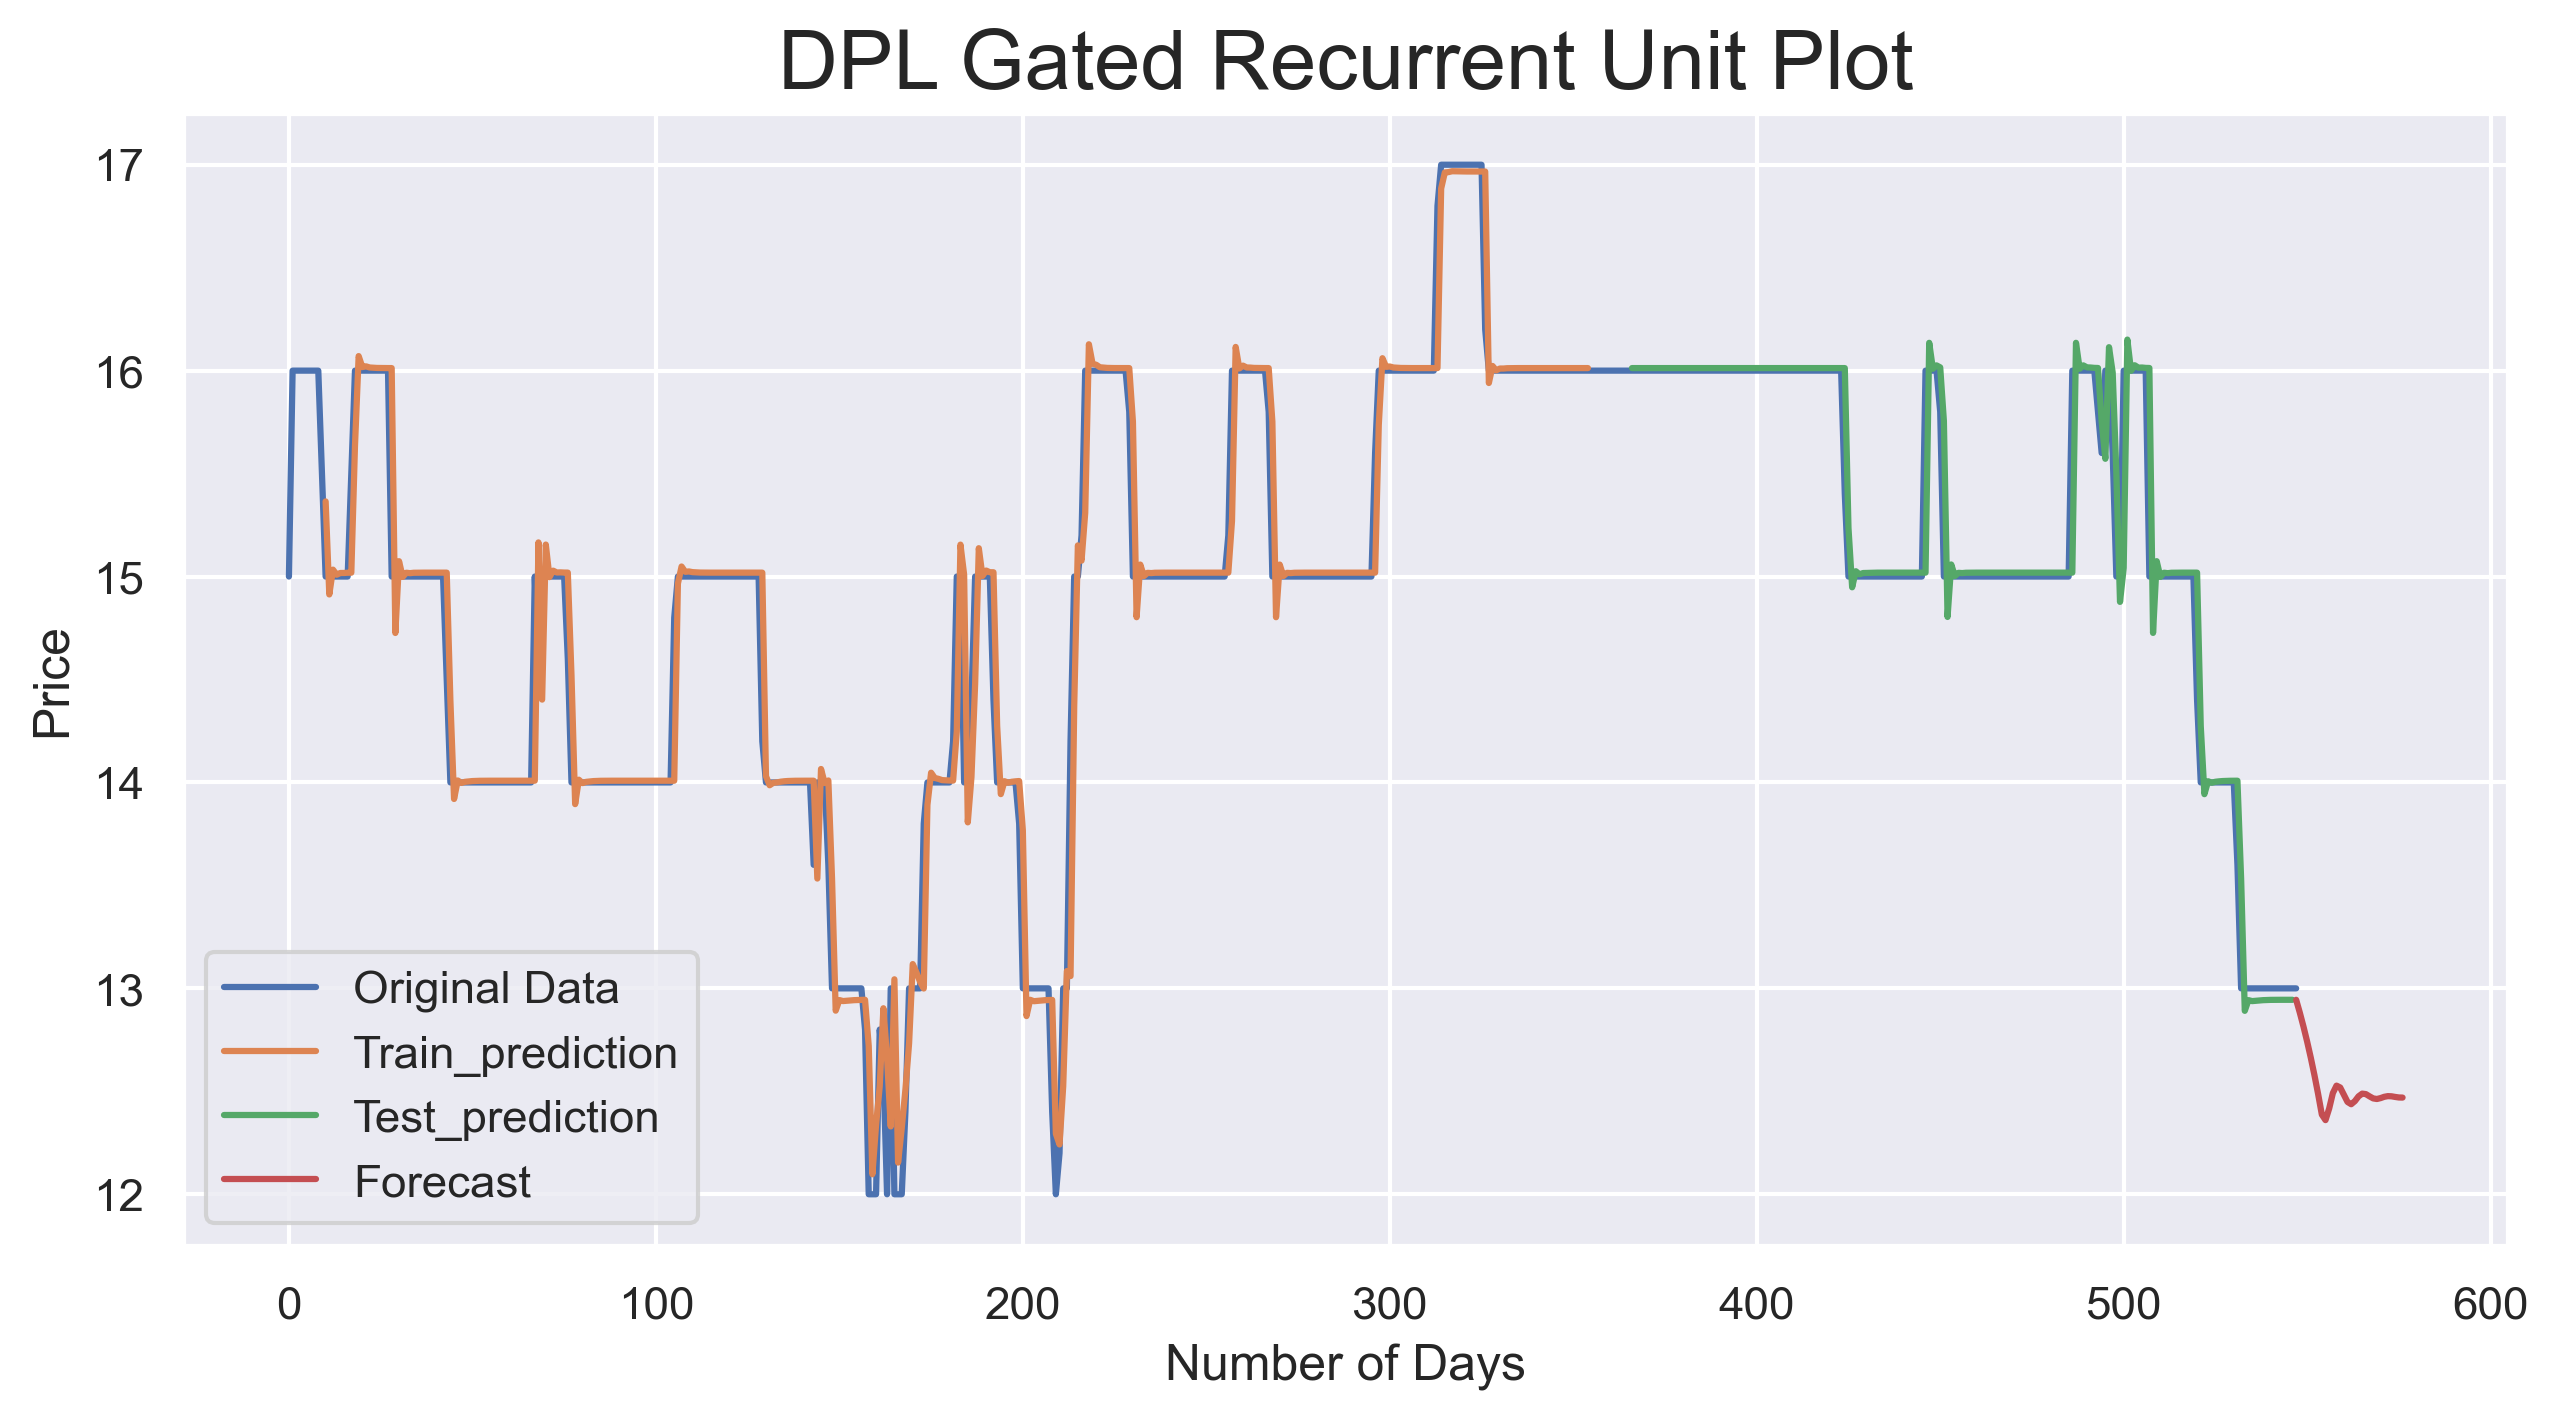

In [38]:
plt.figure(figsize=(10,5),dpi=300)
plt.plot(scaler.inverse_transform(data1), label='Original Data')
plt.plot(trainPredictPlot,label='Train_prediction')
plt.plot(testPredictPlot, label='Test_prediction')
plt.plot(day_pred,scaler.inverse_transform(lst_output), label='Forecast')
plt.title('DPL Gated Recurrent Unit Plot', fontsize=20)
plt.ylabel('Price')
plt.xlabel('Number of Days')
plt.legend()
plt.show()

In [39]:
forecast = forecast.to_csv('predictedData/dpl_gru_forecast.csv')

In [40]:
len(day_pred)

30

In [41]:
len(forecast_rescaled)

30

In [42]:
len(testPredictPlot)

548

In [43]:
np.count_nonzero(np.isnan(testPredictPlot))

367

In [44]:
#convert numpy array to DF
test = pd.DataFrame(testPredictPlot, columns = ['predicted_price'])
test.head

<bound method NDFrame.head of      predicted_price
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
..               ...
543        12.944454
544        12.944454
545        12.944454
546        12.944454
547              NaN

[548 rows x 1 columns]>

In [45]:
test.isnull().sum()

predicted_price    367
dtype: int64

In [46]:
test = test.dropna()
test

,predicted_price
366,16.012403
367,16.012403
368,16.012403
369,16.012403
370,16.012403
...,...
542,12.944454
543,12.944454
544,12.944454
545,12.944454


In [47]:
size = int(len(data) * 0.65)
size

356

In [48]:
#to know the date of test data
data.iloc[355+10:]  #10 for that time steps

,price
date,
2021-10-13,16.0
2021-10-14,16.0
2021-10-18,16.0
2021-10-19,16.0
2021-10-20,16.0
...,...
2022-07-11,13.0
2022-07-12,13.0
2022-07-13,13.0


In [49]:
test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')
test

C:\Users\Asus\AppData\Local\Temp/ipykernel_12092/531574769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = pd.date_range(start='2021-10-15', periods=181, freq='D')


,predicted_price,date
366,16.012403,2021-10-15
367,16.012403,2021-10-16
368,16.012403,2021-10-17
369,16.012403,2021-10-18
370,16.012403,2021-10-19
...,...,...
542,12.944454,2022-04-09
543,12.944454,2022-04-10
544,12.944454,2022-04-11
545,12.944454,2022-04-12


In [50]:
col = ['date','predicted_price']
test = test[col]
test

,date,predicted_price
366,2021-10-15,16.012403
367,2021-10-16,16.012403
368,2021-10-17,16.012403
369,2021-10-18,16.012403
370,2021-10-19,16.012403
...,...,...
542,2022-04-09,12.944454
543,2022-04-10,12.944454
544,2022-04-11,12.944454
545,2022-04-12,12.944454


In [51]:
test = test.set_index('date')
test

,predicted_price
date,
2021-10-15,16.012403
2021-10-16,16.012403
2021-10-17,16.012403
2021-10-18,16.012403
2021-10-19,16.012403
...,...
2022-04-09,12.944454
2022-04-10,12.944454
2022-04-11,12.944454


In [52]:
test = test.to_csv('predictedData/dpl_gru_testPred.csv')